In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Define el modelo CNN
def cnn_model():
    model = tf.keras.models.Sequential()  # Crea un modelo secuencial
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  #Capa de convolución 32 filtros
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))  #Capa de max pooling 2x2
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))  #Capa de convolución 64 filtros
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))  #Capa de max pooling 2x2
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))  #Capa de convolución 64 filtros
    model.add(tf.keras.layers.Flatten())  #Aplana los mapas de características
    model.add(tf.keras.layers.Dense(64, activation='relu'))  #Capa densa con 64 unidades
    model.add(tf.keras.layers.Dense(8, activation='softmax'))  #Capa de salida con 8 clases
    return model

In [3]:
# Ruta al directorio que contiene las imágenes de entrenamiento y prueba
train_dir = r'D:\Tdatos\train'
test_dir = r'D:\Tdatos\test'
# Carga y preprocesa las imágenes usando ImageDataGenerator
image_generator = ImageDataGenerator(rescale=1./255)  # Normaliza los valores de los píxeles en el rango 0-1

In [4]:
# Datos para entrenamiento
train_data = image_generator.flow_from_directory(
    train_dir,
    target_size=(32, 32),  # Redimensiona las imágenes
    batch_size=64,  #Tamano batch
    class_mode='categorical'
)

Found 1633 images belonging to 8 classes.


In [5]:
# Datos para prueba
test_data = image_generator.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical'
)

Found 810 images belonging to 8 classes.


In [6]:
# Crea una instancia del modelo CNN
model = cnn_model()

In [7]:
# Compila el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrena el modelo
model.fit(train_data, epochs=30, validation_data=test_data)

Epoch 1/30
26/26 [==============================] - 24s 910ms/step - loss: 1.4313 - accuracy: 0.5756 - val_loss: 1.3932 - val_accuracy: 0.5667
Epoch 2/30
26/26 [==============================] - 9s 352ms/step - loss: 1.2244 - accuracy: 0.5915 - val_loss: 1.0989 - val_accuracy: 0.6519
Epoch 3/30
26/26 [==============================] - 9s 349ms/step - loss: 0.9039 - accuracy: 0.6754 - val_loss: 0.8029 - val_accuracy: 0.7111
Epoch 4/30
26/26 [==============================] - 9s 355ms/step - loss: 0.7140 - accuracy: 0.7330 - val_loss: 0.6954 - val_accuracy: 0.7383
Epoch 5/30
26/26 [==============================] - 9s 344ms/step - loss: 0.6130 - accuracy: 0.7575 - val_loss: 0.6740 - val_accuracy: 0.7432
Epoch 6/30
26/26 [==============================] - 9s 354ms/step - loss: 0.5209 - accuracy: 0.8022 - val_loss: 0.6401 - val_accuracy: 0.8000
Epoch 7/30
26/26 [==============================] - 9s 348ms/step - loss: 0.5139 - accuracy: 0.8175 - val_loss: 0.7018 - val_accuracy: 0.7765
Epoch

In [8]:
# Evalúa el modelo
test_loss, test_acc = model.evaluate(test_data)
print('Test accuracy:', test_acc)

13/13 [==============================] - 3s 227ms/step - loss: 0.5053 - accuracy: 0.8519
Test accuracy: 0.8518518805503845


In [9]:
# Realiza predicciones en el conjunto de prueba
predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)
true_labels = test_data.classes

# Calcula la matriz de confusión
confusion_mtx = confusion_matrix(true_labels, y_pred)

13/13 [==============================] - 3s 227ms/step


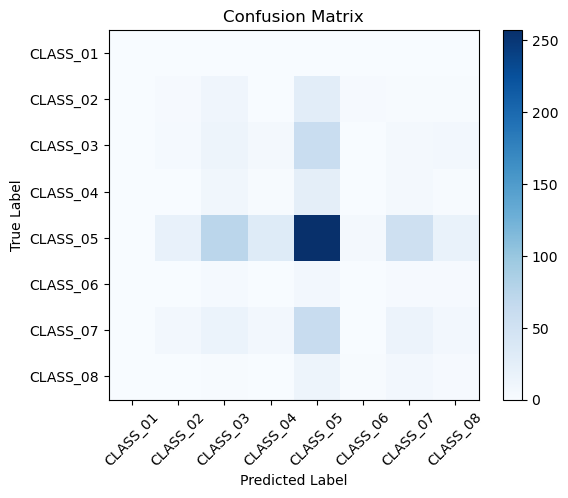

In [10]:
# Grafica la matriz de confusión
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_data.class_indices))
plt.xticks(tick_marks, test_data.class_indices, rotation=45)
plt.yticks(tick_marks, test_data.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [11]:
# Convierte la matriz de confusión en un DataFrame de pandas
confusion_df = pd.DataFrame(confusion_mtx, index=test_data.class_indices.keys(), columns=test_data.class_indices.keys())
# Muestra la matriz de confusión como una tabla
print("Confusion Matrix:")
print(confusion_df)

Confusion Matrix:
          CLASS_01  CLASS_02  CLASS_03  CLASS_04  CLASS_05  CLASS_06  \
CLASS_01         0         0         1         0         0         0   
CLASS_02         0         3        11         0        27         3   
CLASS_03         0         4        13         6        60         1   
CLASS_04         0         1         9         2        25         1   
CLASS_05         0        19        73        32       257         6   
CLASS_06         0         1         4         0         7         1   
CLASS_07         0         7        16         7        61         1   
CLASS_08         0         0         2         0        13         2   

          CLASS_07  CLASS_08  
CLASS_01         0         0  
CLASS_02         2         2  
CLASS_03         6         7  
CLASS_04         5         2  
CLASS_05        54        18  
CLASS_06         3         3  
CLASS_07        15         7  
CLASS_08         7         3  


In [20]:
# Obtén las predicciones para los datos de entrenamiento
train_predictions = model.predict(train_data)
train_pred_labels = np.argmax(train_predictions, axis=1)

26/26 [==============================] - 6s 228ms/step


In [21]:
# Obtén las etiquetas verdaderas de los datos de entrenamiento
train_true_labels = train_data.classes

In [22]:
# Calcula la matriz de confusión
train_confusion_mtx = confusion_matrix(train_true_labels, train_pred_labels)

In [23]:
# Agrega una fila y columna de ceros al principio
train_confusion_mtx = np.insert(train_confusion_mtx, 0, 0, axis=0)
train_confusion_mtx = np.insert(train_confusion_mtx, 0, 0, axis=1)

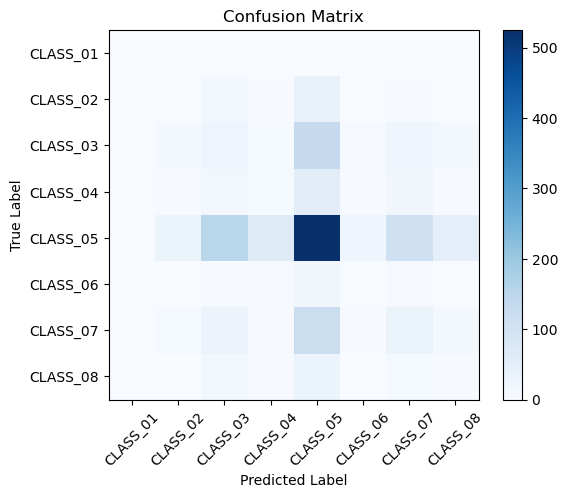

In [24]:
# Grafica la matriz de confusión
plt.imshow(train_confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(train_data.class_indices))
plt.xticks(tick_marks, train_data.class_indices, rotation=45)
plt.yticks(tick_marks, train_data.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
# Convierte la matriz de confusión en un DataFrame de pandas
train_confusion_df = pd.DataFrame(train_confusion_mtx, index=train_data.class_indices.keys(), columns=train_data.class_indices.keys())

In [26]:
# Muestra la matriz de confusión como una tabla
print("Matriz de Confusión (Datos de Entrenamiento):")
print(train_confusion_df)

Matriz de Confusión (Datos de Entrenamiento):
          CLASS_01  CLASS_02  CLASS_03  CLASS_04  CLASS_05  CLASS_06  \
CLASS_01         0         0         0         0         0         0   
CLASS_02         0         0        14         4        40         0   
CLASS_03         0        11        26         8       132         5   
CLASS_04         0         4        14         7        54         4   
CLASS_05         0        32       151        65       525        22   
CLASS_06         0         0         4         5        19         2   
CLASS_07         0         8        29         6       116         3   
CLASS_08         0         1        14         4        32         0   

          CLASS_07  CLASS_08  
CLASS_01         0         0  
CLASS_02         3         1  
CLASS_03        21        10  
CLASS_04        18         4  
CLASS_05       108        46  
CLASS_06         5         2  
CLASS_07        33         9  
CLASS_08         8         4  


In [34]:
# Ruta de la imagen que deseas verificar
imagen_ruta = r'd:\Tdatos\carne5.png'
imagen_ruta = imagen_ruta.replace("\\", "/")  # Reemplaza las barras diagonales inversas por barras diagonales normales

In [35]:
# Carga y preprocesa la imagen
imagen = load_img(imagen_ruta, target_size=(32, 32))
imagen_array = img_to_array(imagen)
imagen_array = np.expand_dims(imagen_array, axis=0)
imagen_array = imagen_array / 255.0

In [36]:
# Realiza la predicción
predicciones = model.predict(imagen_array)
clase_predicha = np.argmax(predicciones[0])

1/1 [==============================] - 0s 22ms/step


In [37]:
# Obtiene las etiquetas de clase
etiquetas_clase = list(train_data.class_indices.keys())

In [38]:
# Imprime la clase predicha
clase_predicha_etiqueta = etiquetas_clase[clase_predicha]
print('Clase predicha:', clase_predicha_etiqueta)

Clase predicha: CLASS_05


In [39]:
# Muestra la clase real y la clase predicha
print("Clase real: ", imagen_ruta.split("/")[-2])

Clase real:  Tdatos


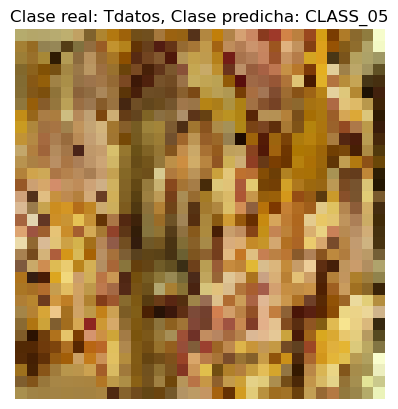

In [40]:
# Muestra la imagen
plt.imshow(imagen)
plt.title('Clase real: ' + imagen_ruta.split("/")[-2] + ', Clase predicha: ' + etiquetas_clase[clase_predicha])
plt.axis('off')
plt.show()